In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [2]:
Cases = pd.read_csv('data/Cases2018.csv', encoding='iso-8859-1')
OldCases = pd.read_csv('data/OldCases.csv', encoding='iso-8859-1')

In [3]:
FullCases = Cases.append(OldCases)

In [4]:
FullCases.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1.0,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1.0,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1,6,3
2,1946-003,1946-003-01,1946-003-01-01,1946-003-01-01-01,11/18/1946,1.0,329 U.S. 29,67 S. Ct. 1,91 L. Ed. 22,1946 U.S. LEXIS 3037,1946,1301,Vinson,21,CHAMPLIN REFINING CO. v. UNITED STATES ET AL.,11/8/1945,10/18/1946,209.0,NaN,27.0,NaN,2.0,66.0,NaN,1.0,107.0,42.0,107.0,42.0,0.0,1.0,NaN,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80250.0,8.0,2.0,0.0,1.0,NaN,2.0,207.0,NaN,84.0,78.0,1,5,4
3,1946-004,1946-004-01,1946-004-01-01,1946-004-01-01-01,11/25/1946,7.0,329 U.S. 40,67 S. Ct. 167,91 L. Ed. 29,1946 U.S. LEXIS 1696,1946,1301,Vinson,26,UNITED STATES v. ALCEA BAND OF TILLAMOOKS ET AL.,1/31/1946,10/25/1946,27.0,NaN,170.0,NaN,1.0,67.0,NaN,0.0,3.0,NaN,3.0,NaN,0.0,10.0,NaN,2.0,1.0,2.0,0.0,0.0,0.0,0.0,20150.0,2.0,2.0,0.0,4.0,NaN,6.0,600.0,49 Stat. 801,87.0,87.0,1,5,3
4,1946-005,1946-005-01,1946-005-01-01,1946-005-01-01-01,11/25/1946,1.0,329 U.S. 64,67 S. Ct. 154,91 L. Ed. 44,1946 U.S. LEXIS 2997,1946,1301,Vinson,50,"UNITED STATES v. HOWARD P. FOLEY CO., INC.",10/25/1946,NaN,27.0,NaN,176.0,NaN,1.0,NaN,NaN,0.0,3.0,NaN,3.0,NaN,0.0,2.0,NaN,2.0,1.0,3.0,0.0,1.0,0.0,0.0,80060.0,8.0,2.0,0.0,7.0,NaN,NaN,NaN,NaN,78.0,87.0,1,6,3


In [5]:
unneeded =FullCases[['caseId','adminActionState','caseOriginState','caseSourceState','docketId','lexisCite','term','naturalCourt','docket','chief','caseName','caseIssuesId','voteId','dateDecision', 'decisionType','usCite','sctCite','ledCite', 'issue','issueArea','decisionDirection','decisionDirectionDissent','authorityDecision1','authorityDecision2','lawType','lawSupp','lawMinor','majOpinWriter','majOpinAssigner']]
labels =FullCases[['declarationUncon', 'caseDisposition', 'caseDispositionUnusual','partyWinning', 'precedentAlteration','voteUnclear','splitVote','majVotes','minVotes']]

In [6]:
FullCases.drop(unneeded, axis=1, inplace=True)
FullCases.drop(labels, axis=1, inplace=True)

In [7]:
FullCases[['dateArgument','dateRearg']]=FullCases[['dateArgument', 'dateRearg']].notnull().astype(int)
FullCases['jurisdiction'] = np.where((FullCases['jurisdiction'] == 2.0) | (FullCases['jurisdiction']==13.0), 1, 0)

In [10]:
FullCases.head()

,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,threeJudgeFdc,caseOrigin,caseSource,lcDisagreement,certReason,lcDisposition,lcDispositionDirection
0,1,1,198.0,0.0,172.0,0.0,0,118.0,0.0,51.0,29.0,0.0,11.0,2.0,1.0
1,1,1,100.0,0.0,27.0,0.0,0,118.0,0.0,123.0,30.0,0.0,4.0,2.0,1.0
2,1,1,209.0,0.0,27.0,0.0,1,66.0,1.0,107.0,107.0,0.0,1.0,0.0,2.0
3,1,1,27.0,0.0,170.0,0.0,0,67.0,0.0,3.0,3.0,0.0,10.0,0.0,2.0
4,1,0,27.0,0.0,176.0,0.0,0,118.0,0.0,3.0,3.0,0.0,2.0,0.0,2.0


In [9]:
FullCases[['petitionerState','threeJudgeFdc','respondentState',]] = FullCases[['petitionerState','threeJudgeFdc','respondentState',]].fillna(value=0.0)
FullCases['respondent'] = FullCases[['respondent']].fillna(value=501)# There was already a code for unidentfiable which i reused for NaN here
FullCases['adminAction'] = FullCases[['adminAction']].fillna(value=118.0)# There was already a code for unidentfiable which i reused for NaN here
FullCases['caseOrigin'] = FullCases[['caseOrigin']].fillna(value=0.0)#meaning originated in supreme court
FullCases['caseSource'] = FullCases[['caseSource']].fillna(value=0.0)##meaning originated in supreme court
#FullCases['caseOriginState'] = FullCases[['caseOriginState']].fillna(value=0.0)
#FullCases['caseSourceState'] = FullCases[['caseSourceState']].fillna(value=0.0)
FullCases['lcDisagreement'] = FullCases[['lcDisagreement']].fillna(value=0.0)
FullCases['certReason'] = FullCases[['certReason']].fillna(value=12)
FullCases['lcDisposition'] = FullCases[['lcDisposition']].fillna(value=0.0)
FullCases['lcDispositionDirection'] = FullCases[['lcDispositionDirection']].fillna(value=3.0)

In [11]:
finalLabels = labels['partyWinning']
FullCases['result'] = labels['partyWinning']

In [12]:
FullCases['result'] = FullCases[['result']].fillna(value=2.0)

In [13]:
FullCases.drop(FullCases[FullCases.result==2.0].index, inplace = True)

In [14]:
labels2 = FullCases[['result']]

In [15]:
FullCases.drop('result', axis=1, inplace=True)

In [16]:
def cats(DF):
    for i in DF.columns:
        DF[i] = pd.Categorical(DF[i])
    return DF

In [17]:
cats(FullCases)
FullCases2 = FullCases

In [18]:
binCols = ['dateArgument','jurisdiction', 'dateRearg','threeJudgeFdc','lcDisagreement']
# Takes all 14 other columns
dummy_cols = list(set(FullCases2.columns) - set(binCols))

In [19]:
FullCases2 = pd.get_dummies(FullCases2, columns=dummy_cols, drop_first=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(FullCases2, labels2, test_size=0.2, random_state=23)

In [21]:
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

In [30]:
params = {'n_estimators': 2000, 'learning_rate': 0.001, 'random_state':23, 'max_depth' :5}
GBC = GradientBoostingClassifier(**params)

In [36]:
GBC2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              n_iter_no_change=None, presort='auto', random_state=23,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [37]:
GBC2.score(X_test, y_test), GBC.score(X_train, y_train)

(0.6288659793814433, 0.6751220835594139)

Text(0, 0.5, 'Deviance')

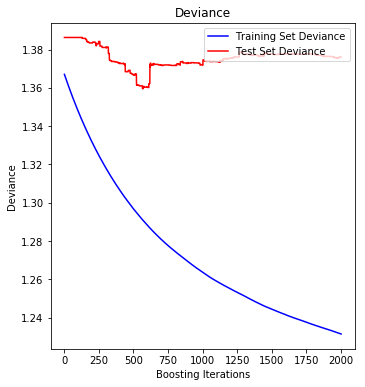

In [33]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(GBC.staged_predict(X_test)):
    test_score[i] = GBC.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, GBC.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [34]:
params = {'n_estimators': 600, 'learning_rate': 0.001, 'random_state':23, 'max_depth' :5}
GBC2 = GradientBoostingClassifier(**params)

In [35]:
feature_importance = GBC2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

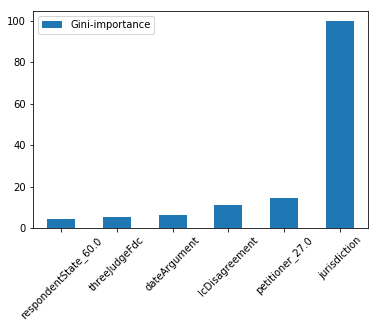

In [28]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(FullCases2.columns, feature_importance):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
imprten = importances.sort_values(by='Gini-importance').tail(6)
imprten.plot(kind='bar', rot=45)

In [ ]:
importances2.head(10)

In [29]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, GBC.predict(X_test)).ravel()
(tn, fp, fn, tp)

(2451, 662, 1230, 1186)

In [ ]:
def permutation_importances(rf, X_train, y_train, metric):
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

In [ ]:
FullCases2.head()

In [ ]:
FullCases.columns

In [ ]:
X_train[(X_train['jurisdiction_2.0']==1) & (X_train['jurisdiction_2.0'])].count()

In [38]:
feature_importance = GBC2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

Text(0, 0.5, 'Deviance')

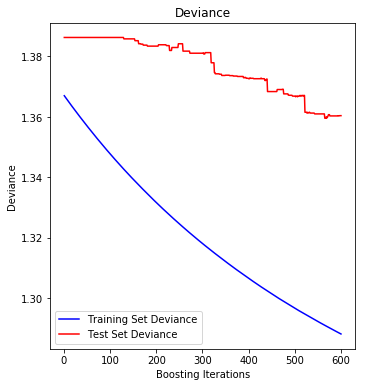

In [41]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(GBC2.staged_predict(X_test)):
    test_score[i] = GBC2.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, GBC2.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='lower left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')